<a href="https://colab.research.google.com/github/Devarsh1302/Task_3/blob/main/Task_3_Devarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Import and Preprocess the Dataset**

In [3]:
df = pd.read_csv('Housing.csv')

# **Explore the data**

In [4]:
print(df.head())
print(df.info())
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [5]:
df = pd.get_dummies(df, drop_first=True)

# Split Data into Train-Test **Sets**

In [7]:
X = df.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression **Model**

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Evaluate the Model**

In [9]:
y_pred = model.predict(X_test)

# **Metrices**

In [10]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


# **Coefficients Interpretation**

In [11]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


# **Plot Regression Line **

In [15]:
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red')
    plt.xlabel('Feature')
    plt.ylabel('Price')
    plt.title('Simple Linear Regression Line')
    plt.show()

# **Residual Plot **

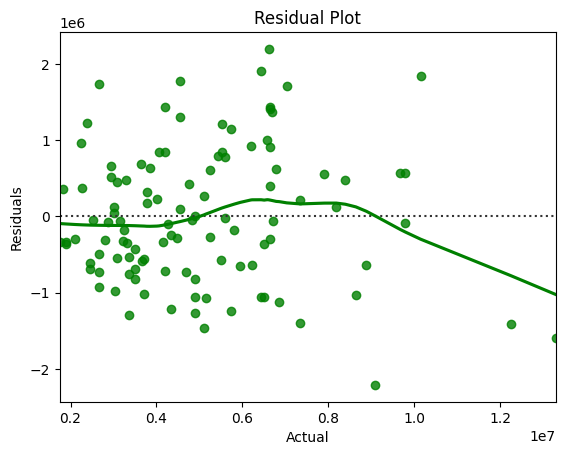

In [13]:
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()